In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

df = pd.read_csv('cleaned_data.csv')
df.head()

,Unnamed: 0,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,...,SynergySP,Arms,Project No.9,David Production,TNK,Telecom Animation Film,White Fox,Wit Studio,Producer,Duration_mins
0,0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,...,False,False,False,False,False,False,False,False,Bandai Visual,24
1,2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26,...,False,False,False,False,False,False,False,False,none,24
2,3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26,...,False,False,False,False,False,False,False,False,Dentsu,25
3,4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52,...,False,False,False,False,False,False,False,False,Dentsu,23
4,5,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145,...,False,False,False,False,False,False,False,False,Nihon Ad Systems,23


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Columns: 102 entries, Unnamed: 0 to Duration_mins
dtypes: bool(72), float64(1), int64(12), object(17)
memory usage: 1.3+ MB


In [4]:
# set categorical types
category_cols = ['Rating','Type','Status','Source','season','Studio','Producer']
int_cols = ['Rank','Episodes','Scored By','Popularity','Favorites','Members','Premier_Month']
float_cols = ['Score']

genres = ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi']
studios = ['Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit Studio']

types = dict([(i,'category') for i in category_cols])
df = df.astype(types)

### Analysis of Categorical Data

The seasons column has been encoded as integers:

0. Winter
1. Spring
2. Summer
3. Autumn

In [5]:
catdf = df[category_cols]
catdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Rating    4281 non-null   category
 1   Type      4281 non-null   category
 2   Status    4281 non-null   category
 3   Source    4281 non-null   category
 4   season    4281 non-null   category
 5   Studio    4281 non-null   category
 6   Producer  4281 non-null   category
dtypes: category(7)
memory usage: 34.5 KB


In [6]:
for col in catdf:
    print(f'=============== {col} ===============')
    print("Types of Categories :", len(catdf[col].unique()))
    print(catdf[col].value_counts())
    print()

=============== Rating ===============
Types of Categories : 6
Rating
PG-13 - Teens 13 or older         2528
G - All Ages                       594
R - 17+ (violence & profanity)     537
PG - Children                      338
R+ - Mild Nudity                   258
UNKNOWN                             26
Name: count, dtype: int64

=============== Type ===============
Types of Categories : 1
Type
TV    4281
Name: count, dtype: int64

=============== Status ===============
Types of Categories : 2
Status
Finished Airing     4242
Currently Airing      39
Name: count, dtype: int64

=============== Source ===============
Types of Categories : 16
Source
Manga           1501
Original         963
Light novel      420
Game             264
Unknown          264
Visual novel     162
4-koma manga     139
Novel            136
Web manga        136
Other            131
Mixed media       56
Card game         45
Book              33
Picture book      15
Music             12
Radio              4
Name: count

In [7]:
catdf = catdf.drop(columns=['Type','Status'])

'Type' is dropped because it is singly catagorised to TV\
'Status' is dropped too since whether show is currently airing is relatively insignificant in determining 'Score' 

We are left with categorial variables: Rating, Source, season, Studio\
'Produers' has been excluded, since we feel that Producers do not have a large impact on how well an anime does

=============== Rating ===============


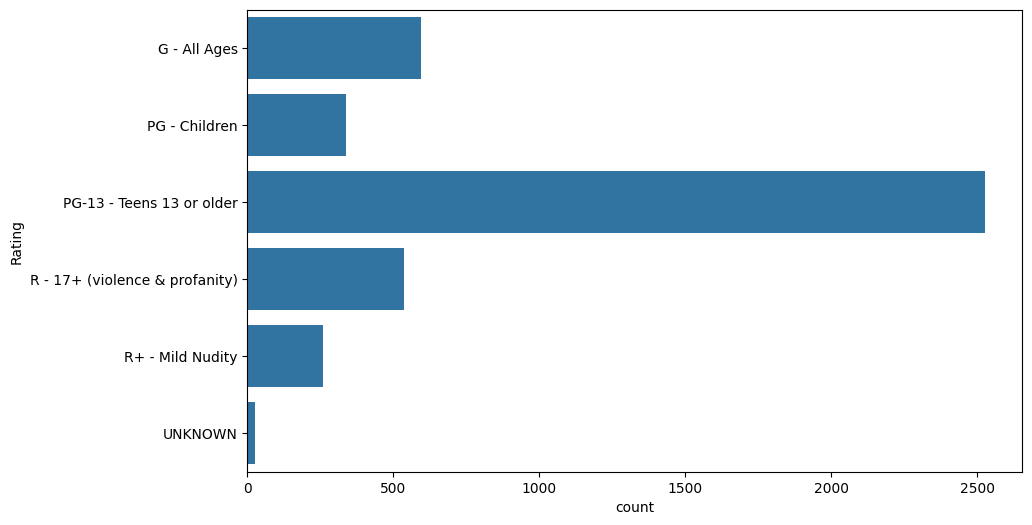

categories: 6


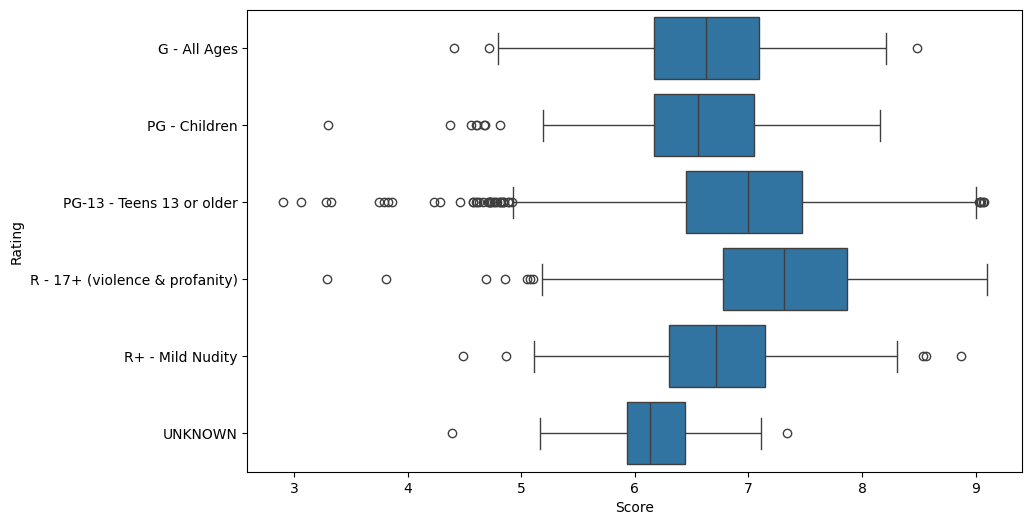

=============== Source ===============


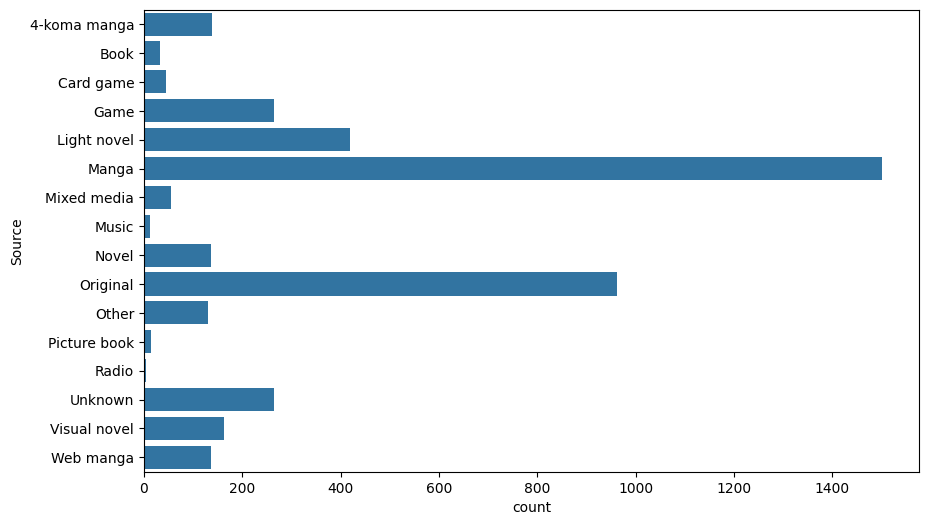

categories: 16


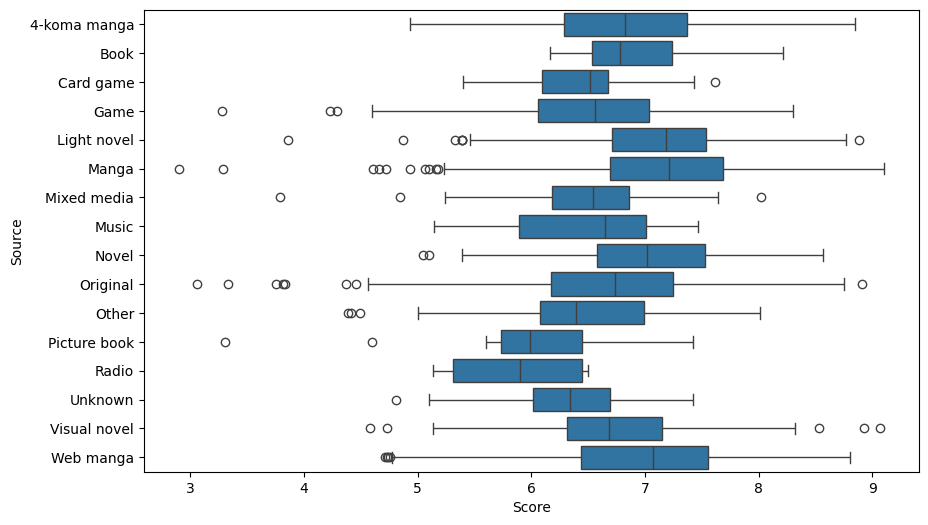

=============== season ===============


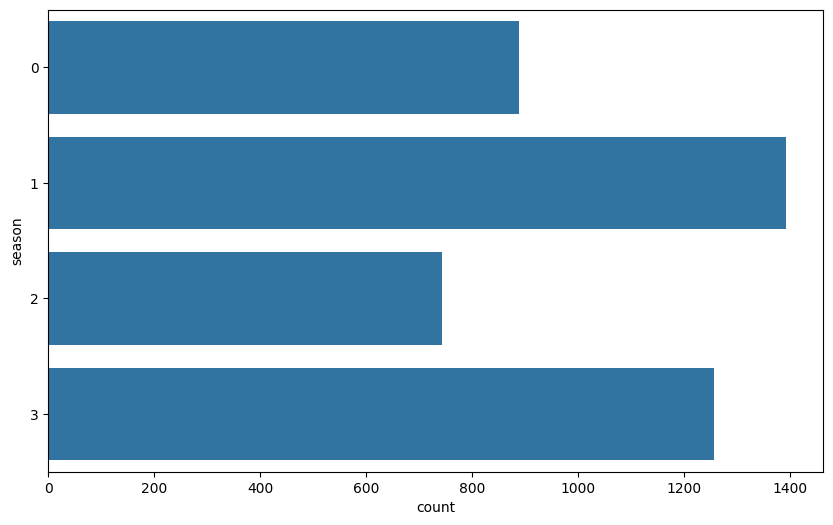

categories: 4


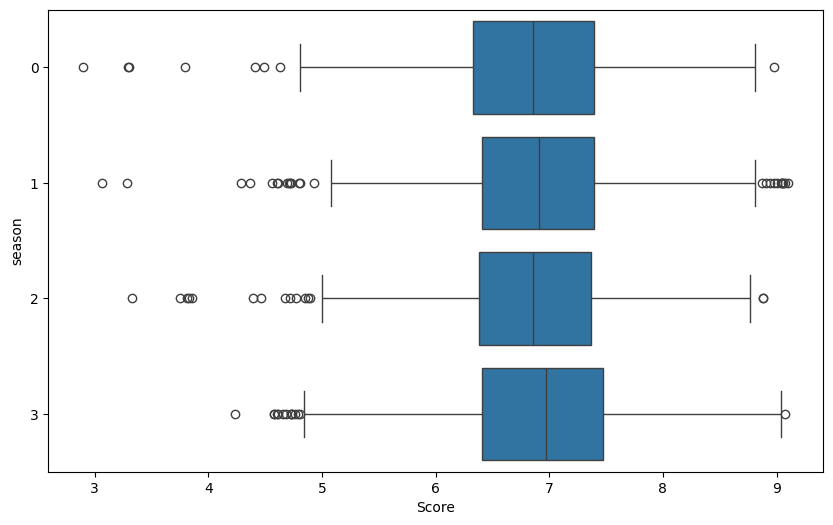

=============== Studio ===============


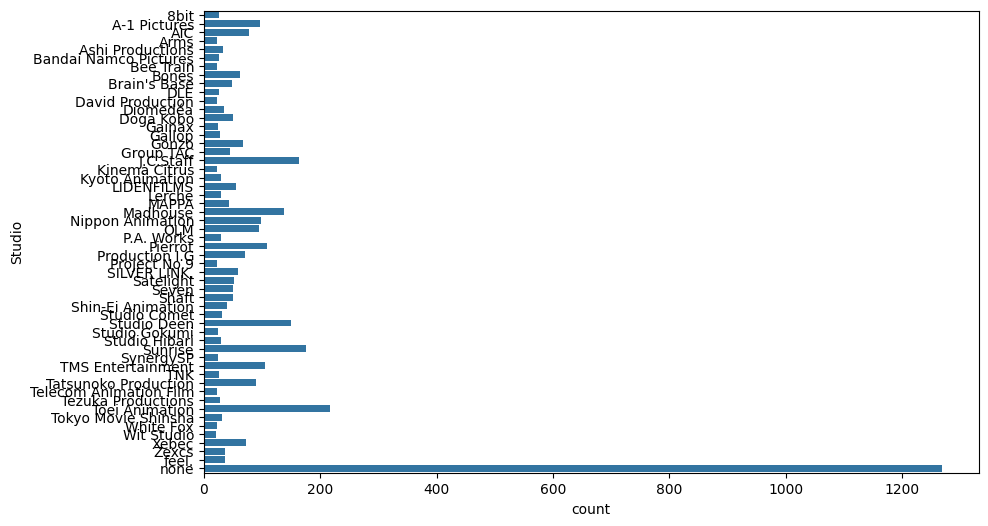

categories: 54


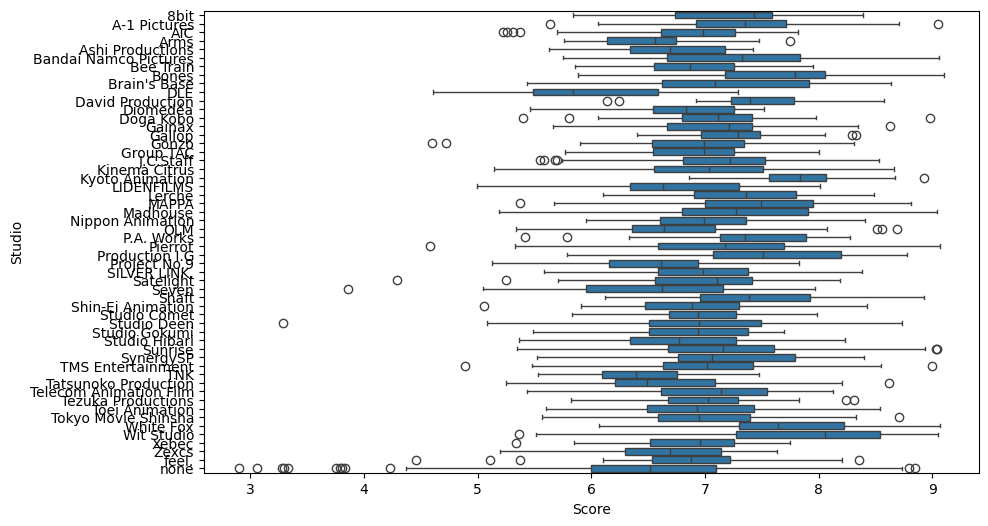

=============== Producer ===============


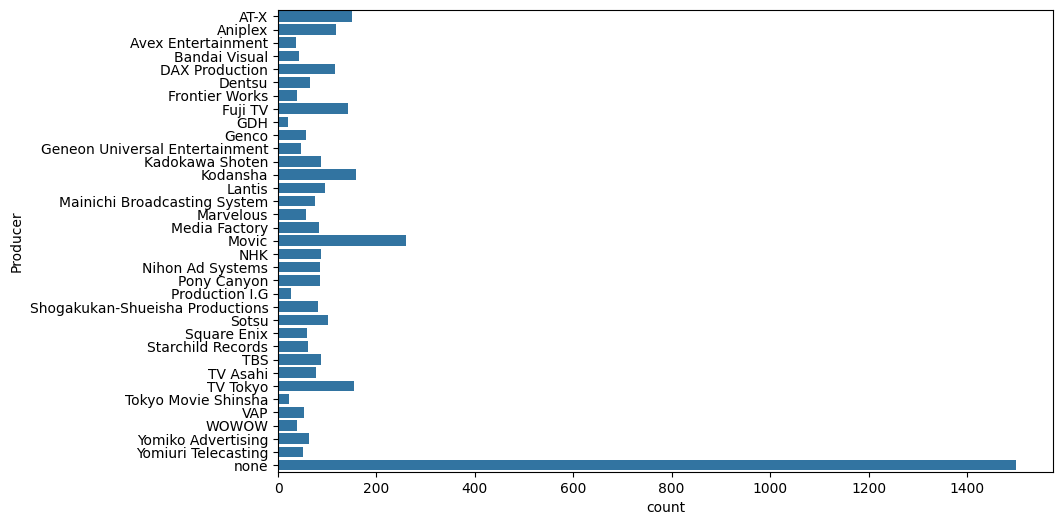

categories: 35


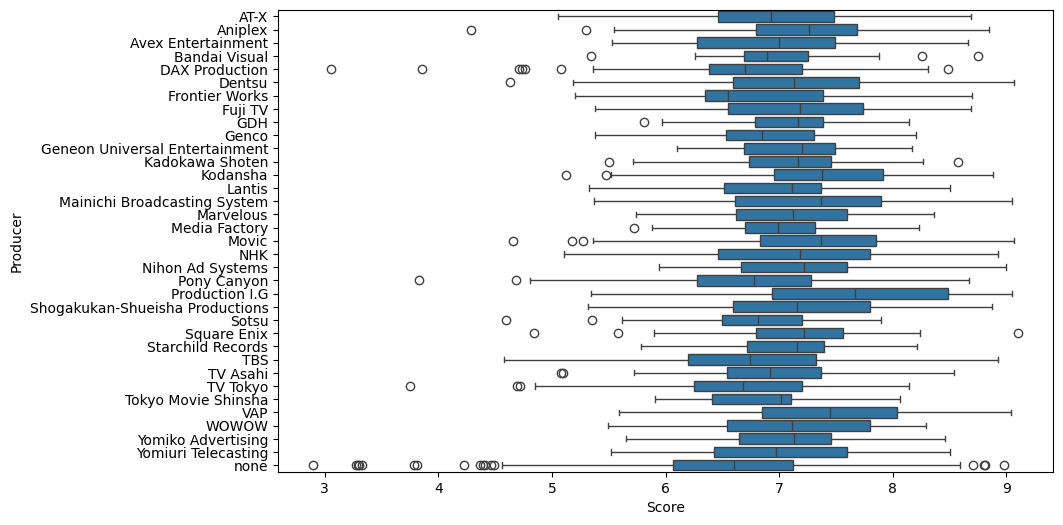

In [27]:
def plot_categories(x,y):
    """plot the boxplot of x against y, as well as the countplot of y.
    @param x: The variable to be investigated
    @param y: The categorical data"""
    print(f'=============== {y} ===============')
    df2 = df[[y, x]].astype({y:'category'}) # need to set variable as category
    cats = df2[y].cat.categories
    plt.figure(figsize=(10,6))
    sb.countplot(data=df2[y])
    plt.show()
    print(f'categories: {len(cats)}')

    plt.figure(figsize=(10,6))
    sb.boxplot(data=df2, x=x,y=y,orient='h')
    plt.show()

for y in catdf:
    plot_categories('Score',y)

### Categorical Data Conclusion
- `Studio` is he only Category which has a large impact on the average scores, with median scores ranging from 6 to 8.
- `Producer` appears to have some influence, but most of the distributions appear more or less similar.
- `Source` initially appears to have a large impact, but in reality it is the much less common sources that have underperforming scores, while the more common sources have about the same distribution.


## Genre Analysis
As Genre shares a many-to-many relationship with Titles, it is not possible to express and analyse in a single column. We use the one-hot encoded columns (from clean_data.ipynb) to take a closer look at Genres

In [13]:
df['Genres'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4281 entries, 0 to 4280
Series name: Genres
Non-Null Count  Dtype 
--------------  ----- 
4281 non-null   object
dtypes: object(1)
memory usage: 33.6+ KB


In [14]:

df['Genres'] = df['Genres'].astype('string')
def count_animes_by_genre(data, genre_col):
  """
  This function counts the number of animes in each genre.

  Args:
      data: A pandas DataFrame containing the anime data.
      genre_col: The name of the column containing the genres (strings with multiple genres separated by a delimiter).

  Returns:
      A dictionary where keys are genres and values are the number of animes in that genre.
  """
  genre_counts = {}
  delimiter = ","  # Modify this delimiter based on how genres are separated in your data

  for genres in data[genre_col]:
    for genre in genres.split(delimiter):
      genre = genre.strip()  # Remove leading/trailing spaces
      if genre not in genre_counts:
        genre_counts[genre] = 0
      genre_counts[genre] += 1

  return genre_counts


In [15]:
for i in genres:
    genre_count=count_animes_by_genre(df, 'Genres')
genre_count

{'Action': 1458,
 'Award Winning': 54,
 'Sci-Fi': 878,
 'Adventure': 995,
 'Drama': 830,
 'Mystery': 318,
 'Supernatural': 460,
 'Fantasy': 1091,
 'Sports': 251,
 'Comedy': 1826,
 'Romance': 780,
 'Slice of Life': 449,
 'Suspense': 75,
 'Ecchi': 307,
 'Gourmet': 57,
 'Avant Garde': 18,
 'Horror': 135,
 'Girls Love': 43,
 'Boys Love': 30,
 'UNKNOWN': 118}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Award Winning'),
  Text(2, 0, 'Sci-Fi'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Drama'),
  Text(5, 0, 'Mystery'),
  Text(6, 0, 'Supernatural'),
  Text(7, 0, 'Fantasy'),
  Text(8, 0, 'Sports'),
  Text(9, 0, 'Comedy'),
  Text(10, 0, 'Romance'),
  Text(11, 0, 'Slice of Life'),
  Text(12, 0, 'Suspense'),
  Text(13, 0, 'Ecchi'),
  Text(14, 0, 'Gourmet'),
  Text(15, 0, 'Avant Garde'),
  Text(16, 0, 'Horror'),
  Text(17, 0, 'Girls Love'),
  Text(18, 0, 'Boys Love'),
  Text(19, 0, 'UNKNOWN')])

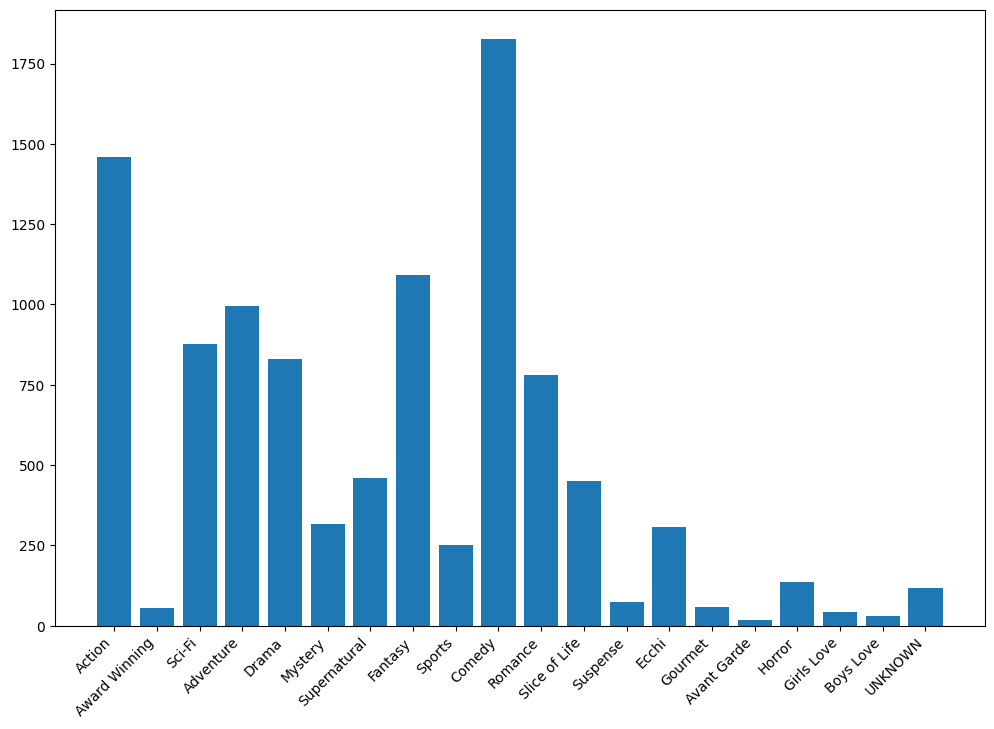

In [16]:
f,ax = plt.subplots(figsize=(12,8))
plt.bar(genre_count.keys(),genre_count.values())
plt.xticks(rotation = 45, ha = 'right')

,Genre,Count,25,50,75
0,Action,1458,6.4200,6.960,7.4300
1,Adventure,995,6.4000,6.900,7.3600
2,Avant Garde,18,6.1550,6.615,7.2200
3,Award Winning,54,7.5150,7.895,8.3325
4,Boys Love,30,6.7225,7.020,7.4550
5,Comedy,1826,6.3700,6.880,7.3500
6,Drama,830,6.7300,7.205,7.6475
7,Fantasy,1091,6.4200,6.940,7.4150
8,Girls Love,43,6.5200,6.960,7.4250
9,Gourmet,57,6.4200,7.020,7.5300


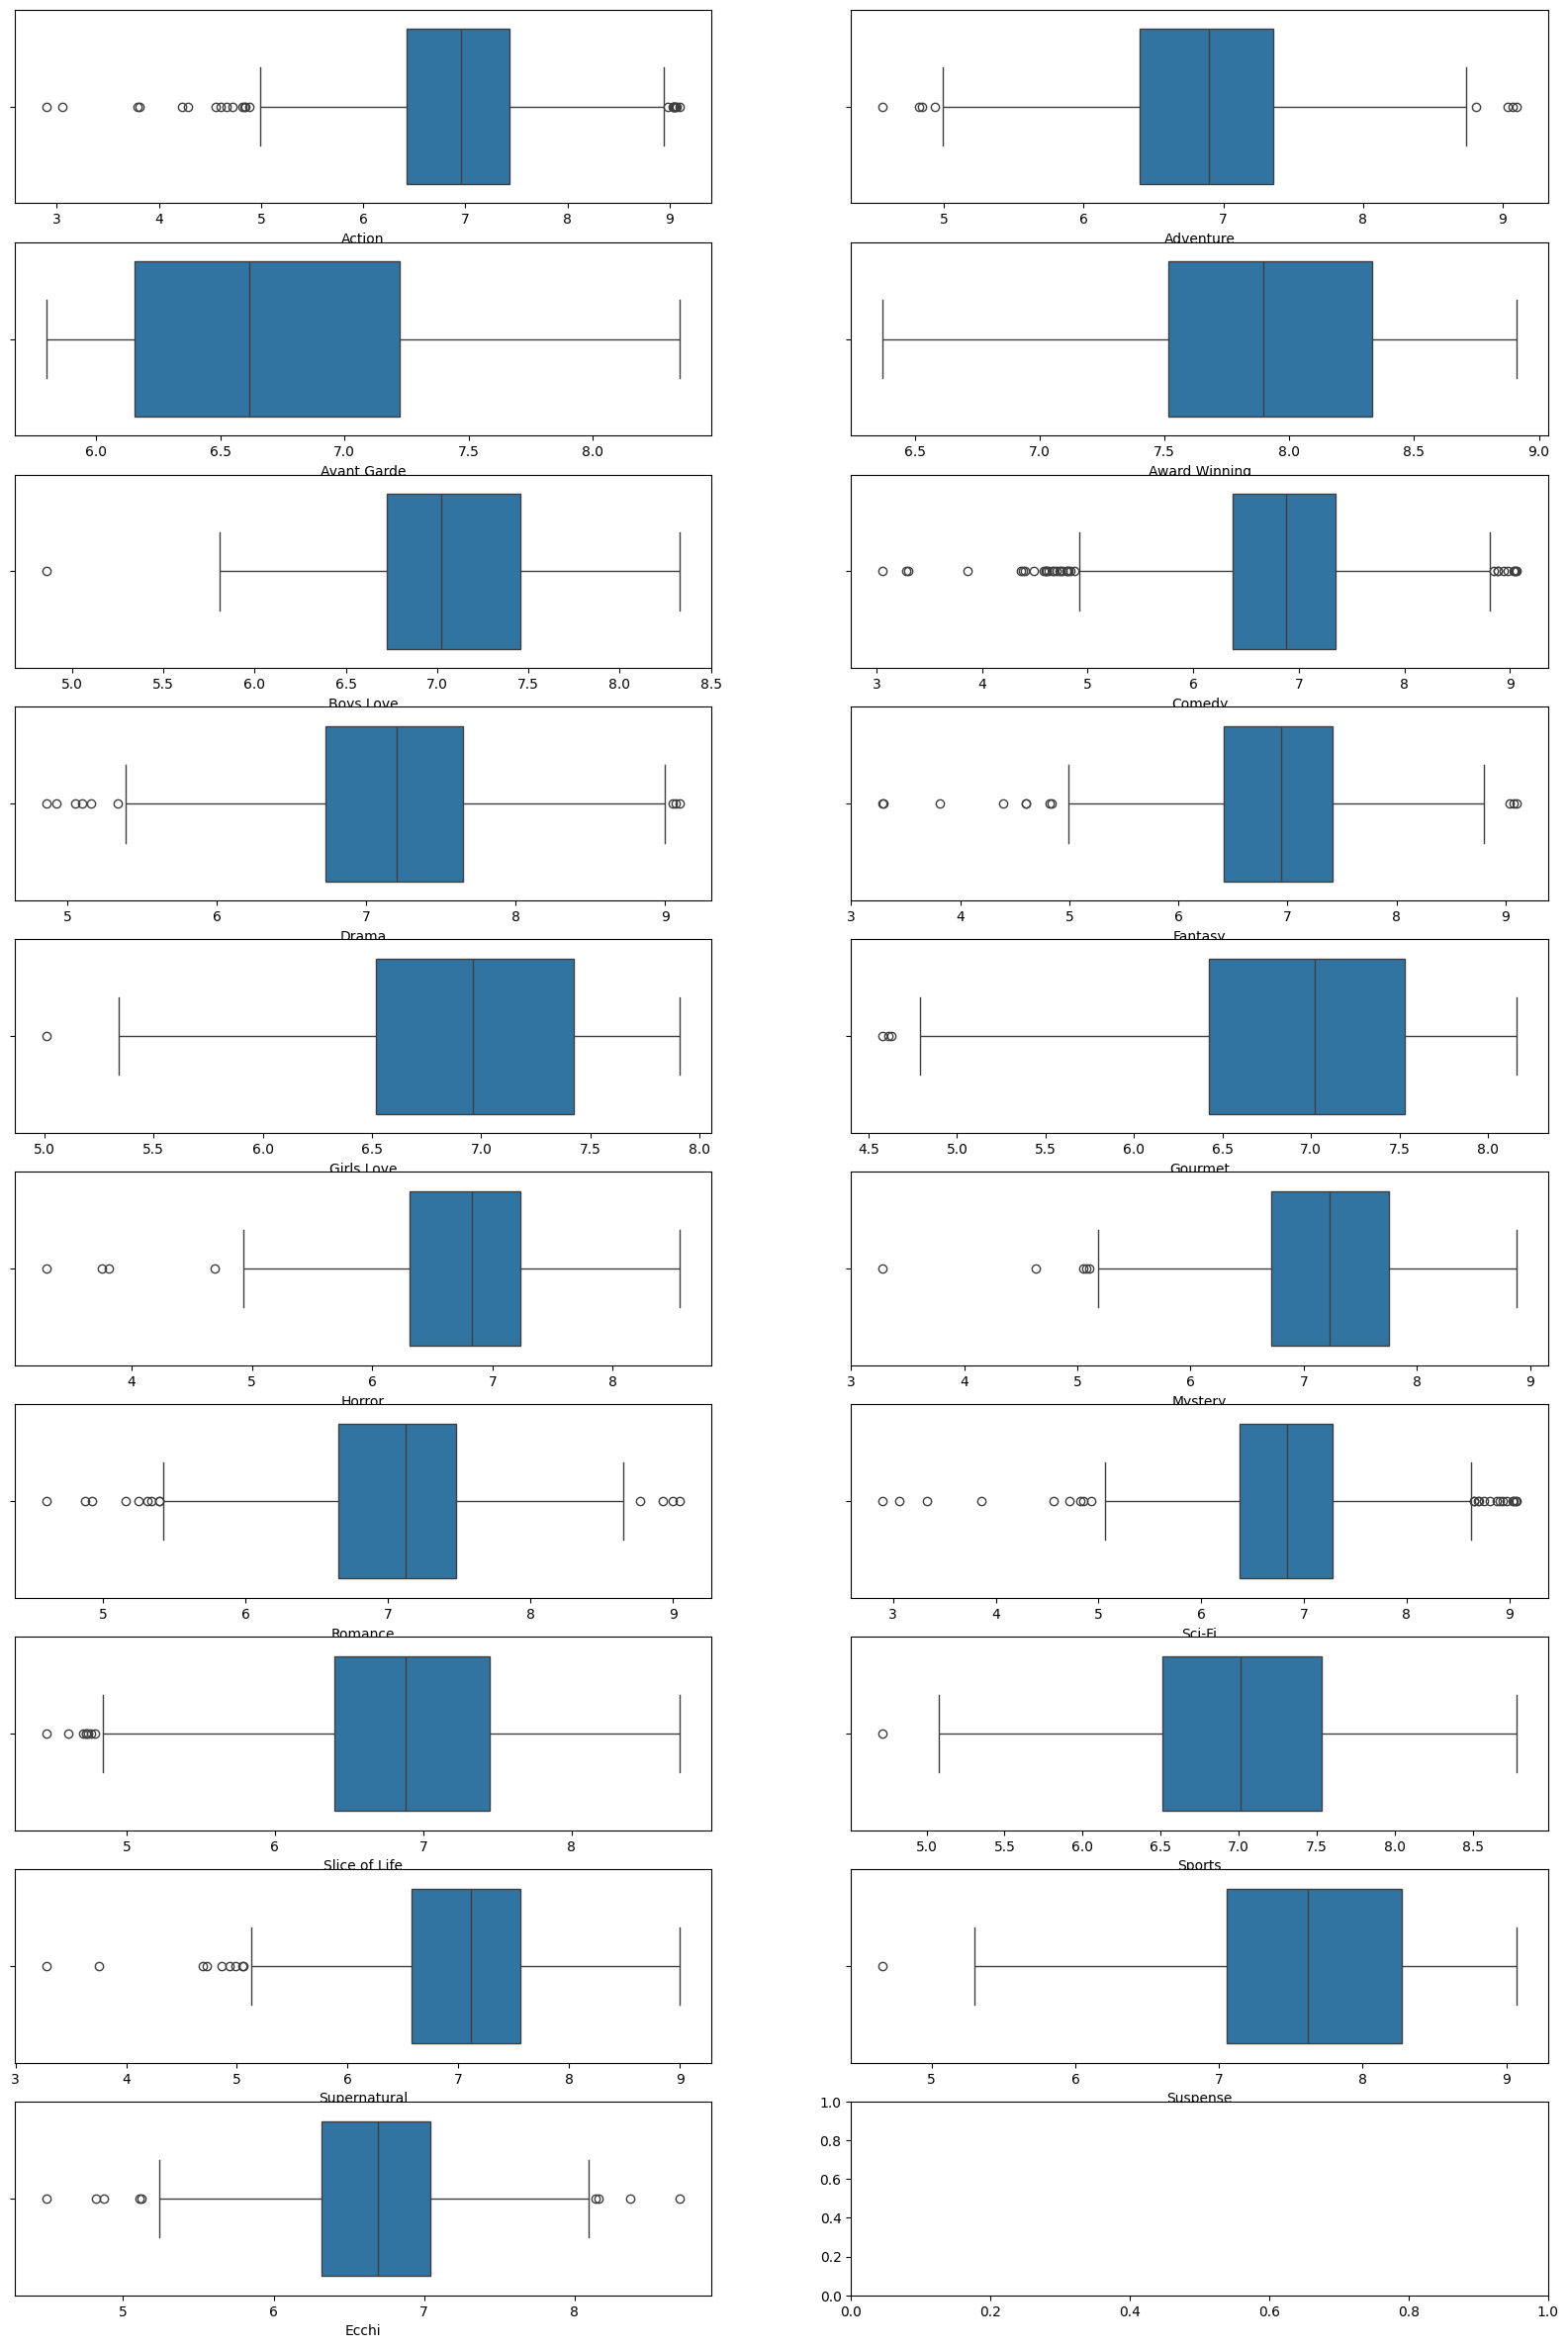

In [58]:
# this will become the dataframe storing the genre stats
genre_stats = []
f, axes = plt.subplots(10,2,figsize=(20,30))
count = 0
row = 0
for count, genre in enumerate(genres):
    df2 = df[df[genre]==True]
    col = count%2
    sb.boxplot(data = df2['Score'], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(genre,fontsize=10)

    if count % 2: row += 1

    # create DF row for the stat
    stats = [genre]

    # get count
    count = len(df2.index)
    stats.append(count)
    
    # get quantiles
    quantiles = [0.25,0.5,0.75]
    for quantile in quantiles:
        stats.append(df2['Score'].quantile(quantile))

    genre_stats.append(stats)
    
genre_stats = pd.DataFrame(genre_stats,columns=['Genre','Count','25','50','75'])
genre_stats

### Genre Conclusion
`Genre` seems to have a significant impact on score.

### Analysis of Float Variable, Score

'Score' is also the only float variable\
It also happens to be the variable we are using to indicate if an anime is good or not

In [18]:
df["Score"].describe()

count    4281.000000
mean        6.890075
std         0.801382
min         2.900000
25%         6.380000
50%         6.910000
75%         7.410000
max         9.100000
Name: Score, dtype: float64

<Axes: xlabel='Score'>

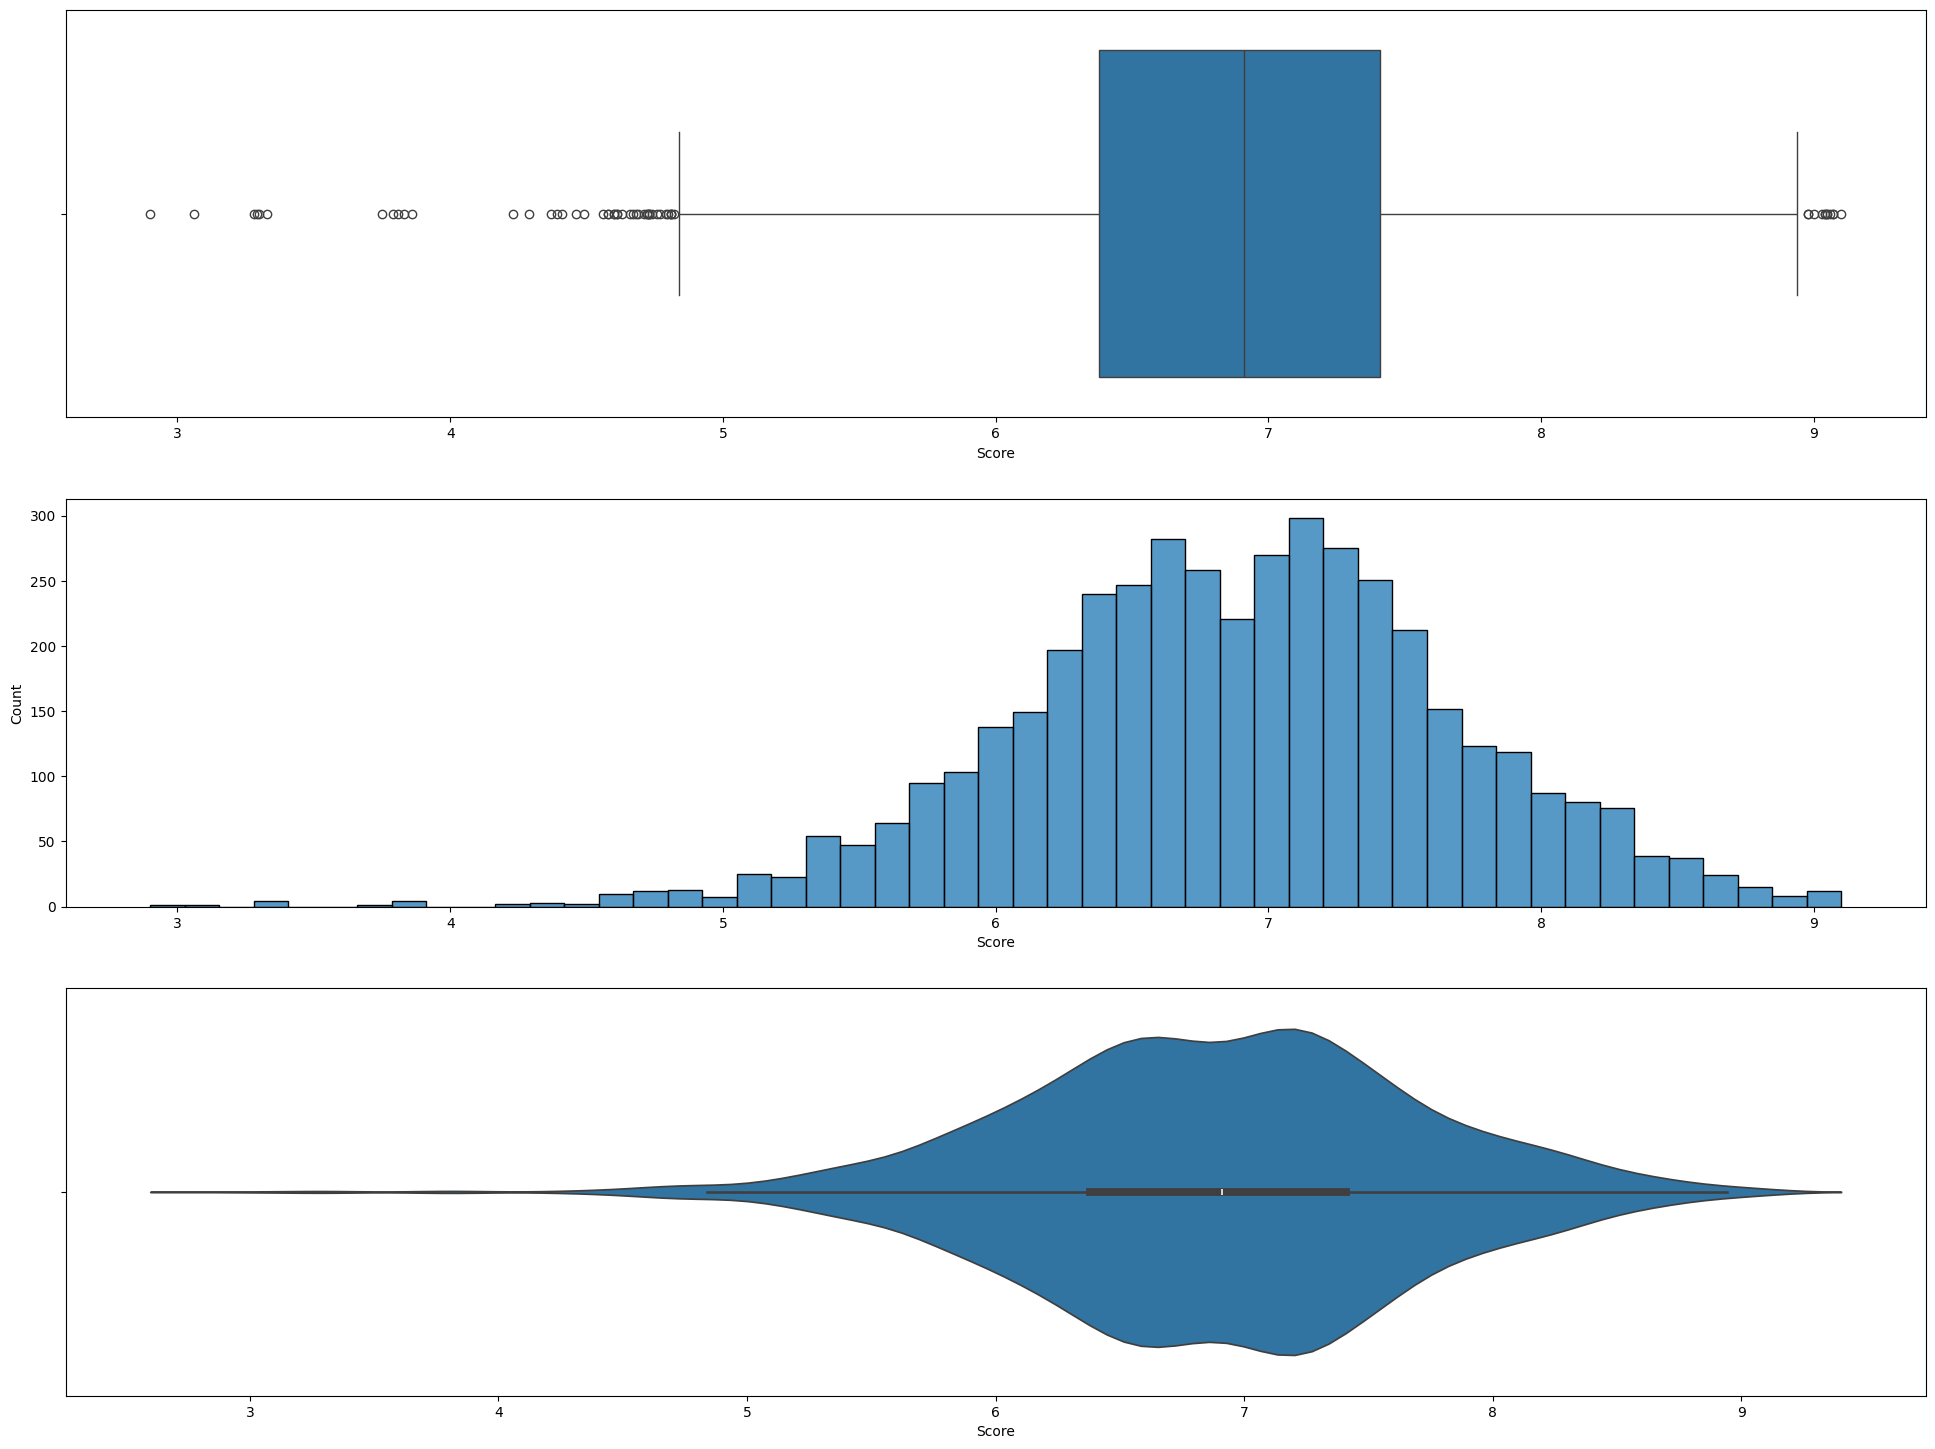

In [19]:
f, axes = plt.subplots(3,figsize=(24, 18))
sb.boxplot(data = df["Score"], orient = "h", ax = axes[0])
sb.histplot(data = df["Score"],ax = axes[1])
sb.violinplot(data = df["Score"], orient = "h", ax = axes[2])

## Analysis of Numeric Variables


In [ ]:
numdf=df[int_cols]
numdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Rank           4281 non-null   int64
 1   Episodes       4281 non-null   int64
 2   Scored By      4281 non-null   int64
 3   Popularity     4281 non-null   int64
 4   Favorites      4281 non-null   int64
 5   Members        4281 non-null   int64
 6   Premier_Month  4281 non-null   int64
dtypes: int64(7)
memory usage: 234.2 KB


In [ ]:
numdf.describe().round(2)

,Rank,Episodes,Scored By,Popularity,Favorites,Members,Premier_Month
count,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00
mean,4723.65,29.06,83533.26,4629.42,2148.06,161782.98,1301.47
std,3165.26,61.53,201975.42,3948.59,9585.19,330540.43,149.37
min,1.00,2.00,113.00,1.00,1.00,405.00,735.00
25%,2046.00,12.00,2172.00,1355.00,14.00,6353.00,1239.00
50%,4336.00,13.00,13524.00,3454.00,111.00,36671.00,1344.00
75%,6955.00,26.00,69778.00,7263.00,778.00,161732.00,1413.00
max,12689.00,1787.00,2660903.00,15842.00,217606.00,3744541.00,1479.00


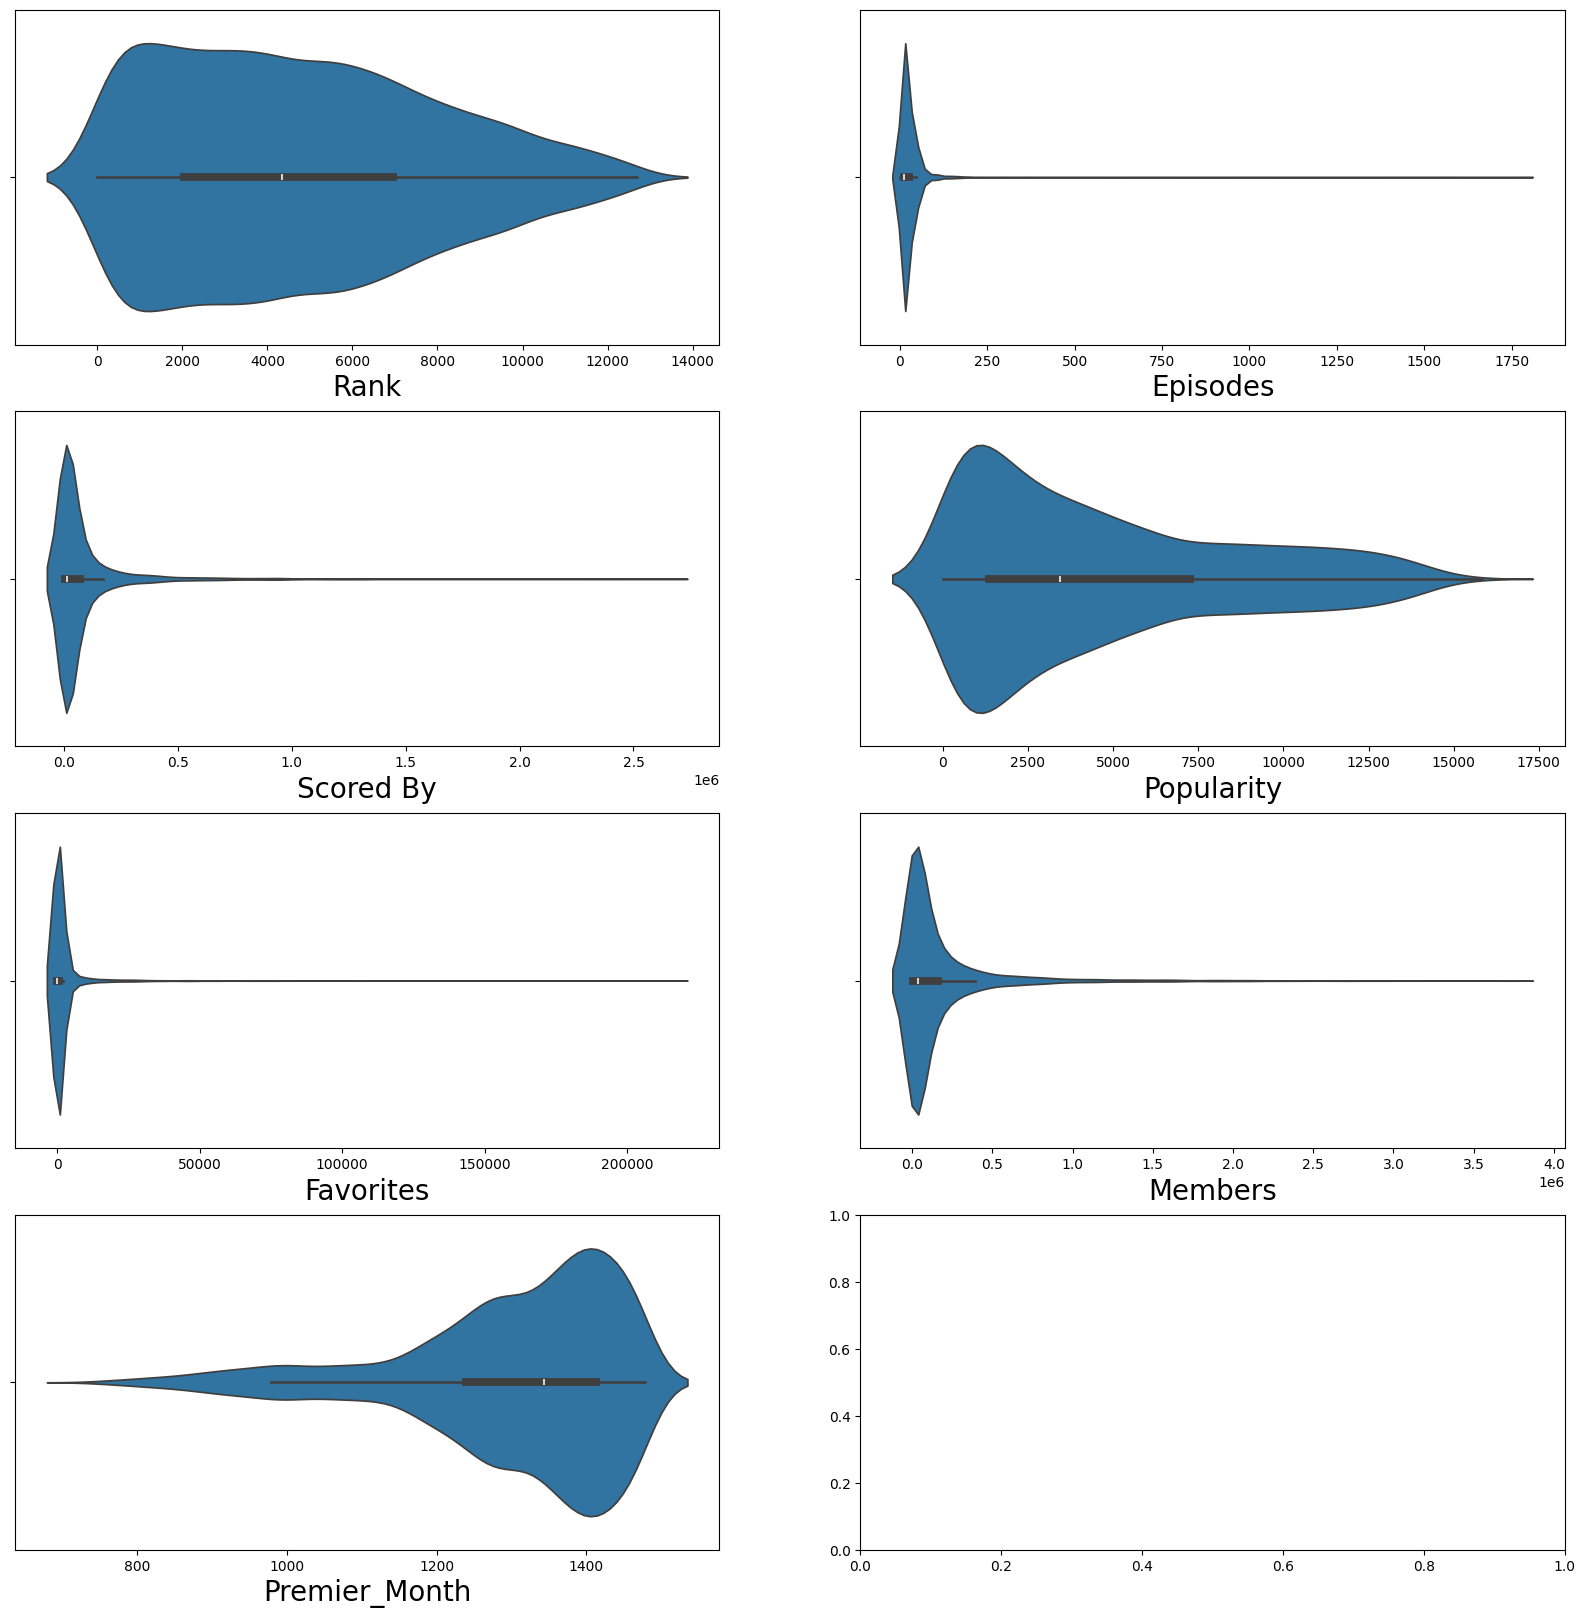

In [ ]:
f, axes = plt.subplots(4,2,figsize=(20,20))
count = 0
row = 0
othernumericaldata = [x for x in numdf.columns]
for count, var in enumerate(othernumericaldata):
    col = count % 2
    sb.violinplot(data = numdf[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=20)
    if count %2: row+=1

### Plotting the numerical data

For Premier Month: Months since 1900 that the show premiered in

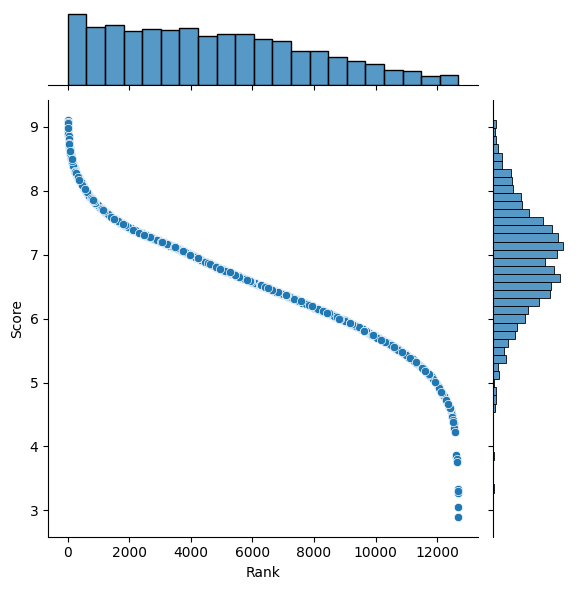

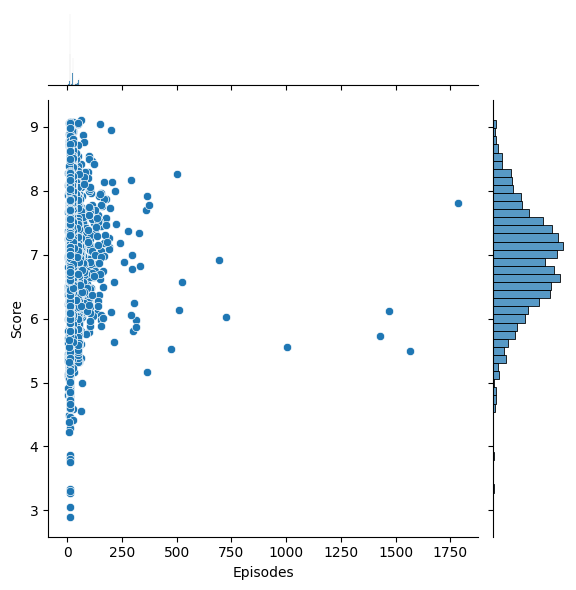

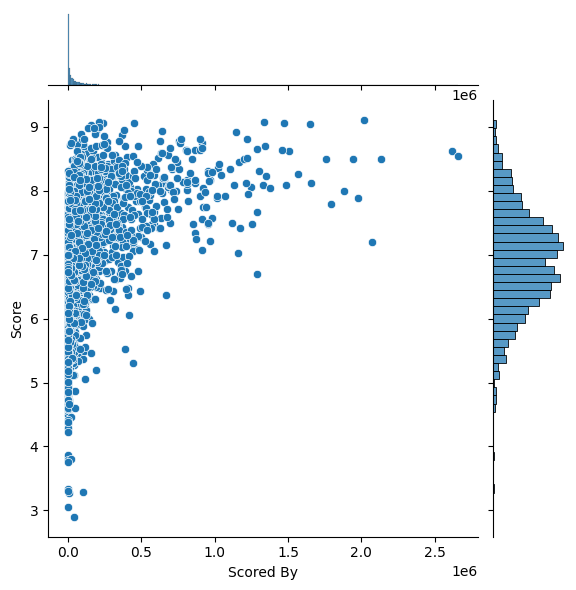

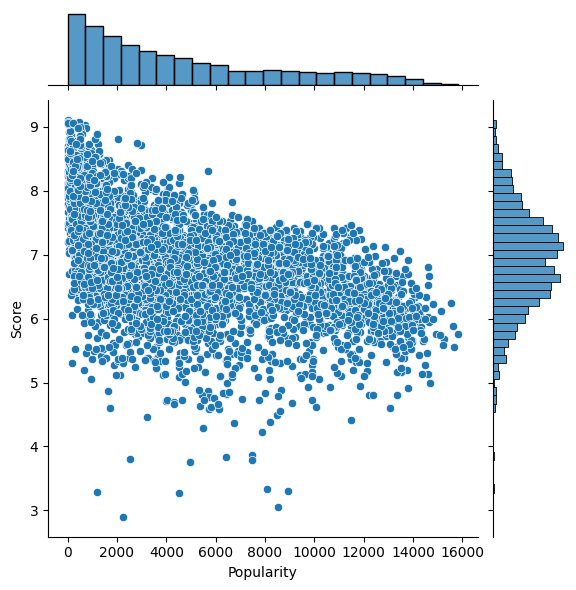

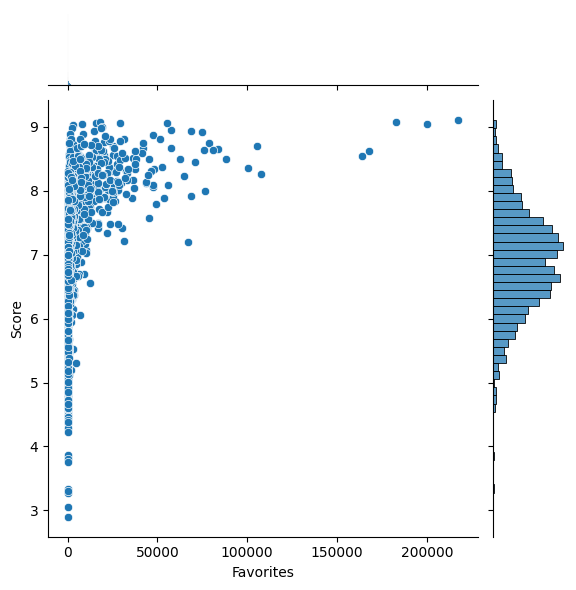

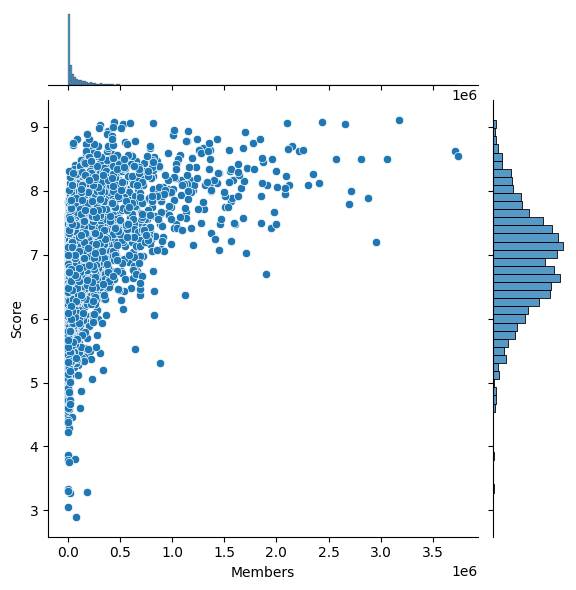

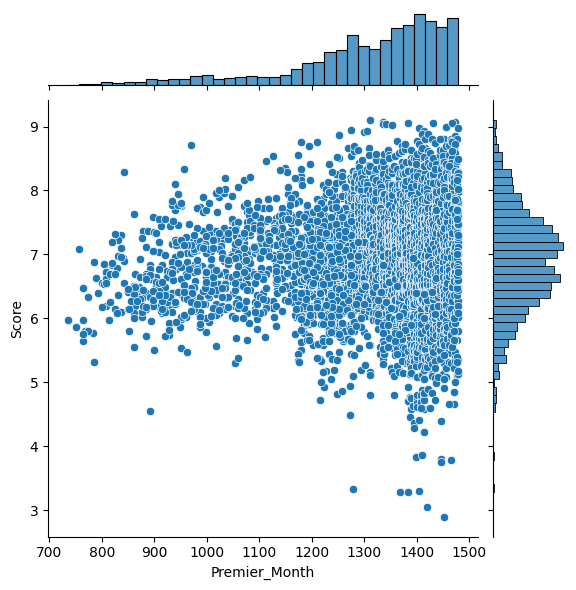

In [20]:
for y in numdf:
    sb.jointplot(x=df[y],y=df['Score'])

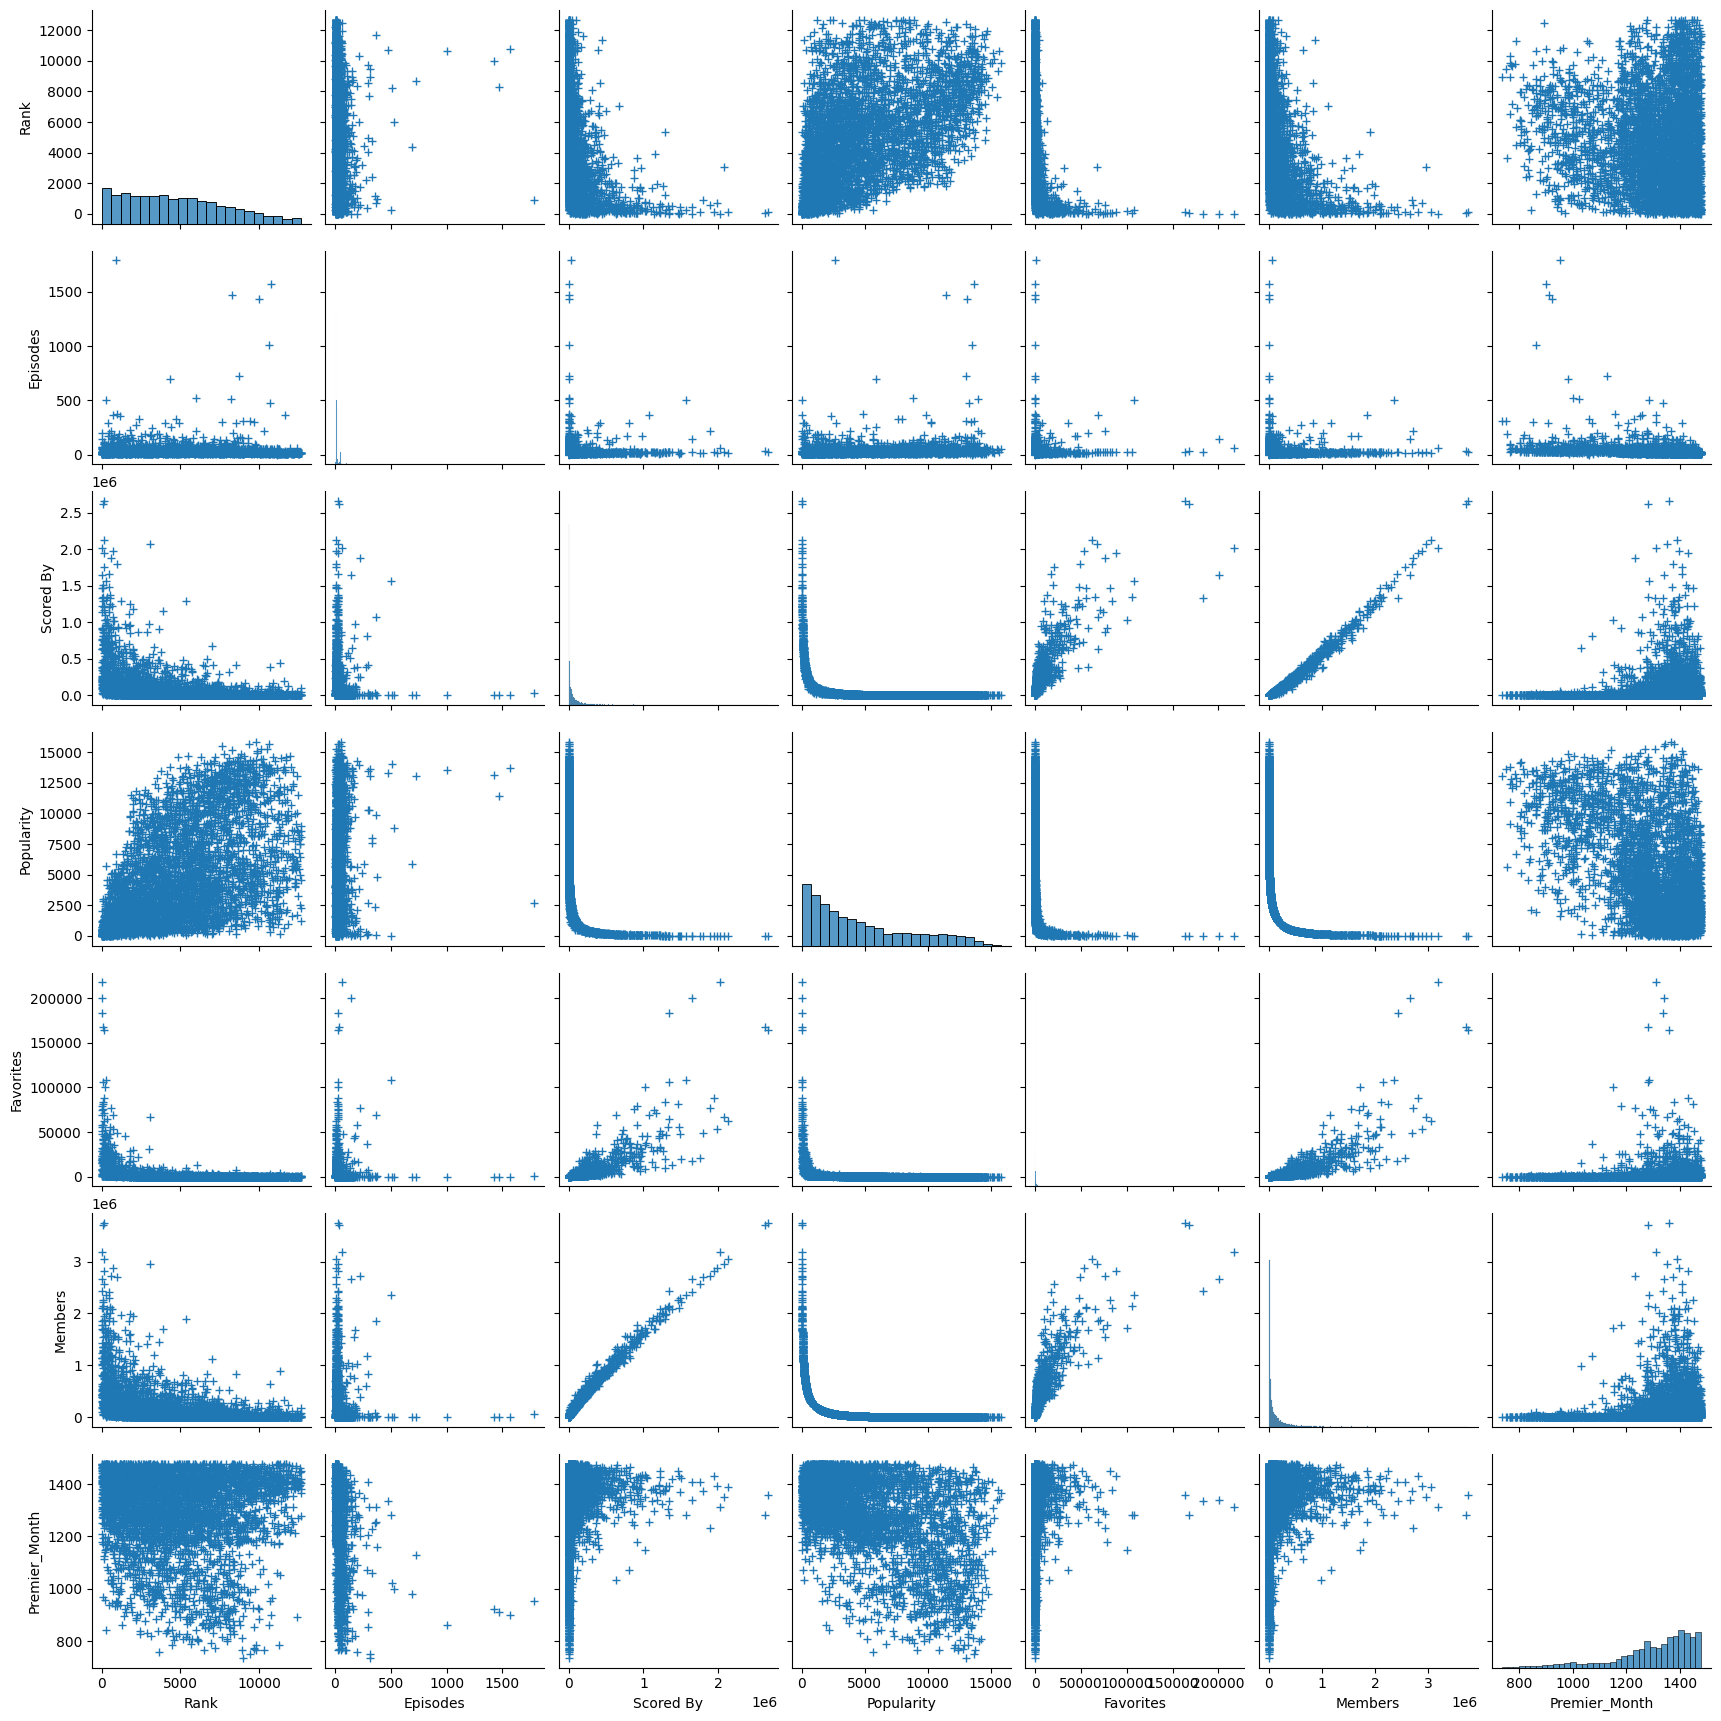

In [21]:
sb.pairplot(data = numdf, plot_kws=dict(marker="+", linewidth=1))

### Numerical Analysis Conclusion
We can choose the best variables to predict score based on their correlation.

                   Rank  Episodes  Scored By  Popularity  Favorites   Members  \
Rank           1.000000  0.009722  -0.363999    0.553830  -0.270705 -0.405229   
Episodes       0.009722  1.000000  -0.013035    0.181341   0.042069 -0.025364   
Scored By     -0.363999 -0.013035   1.000000   -0.421085   0.795524  0.989240   
Popularity     0.553830  0.181341  -0.421085    1.000000  -0.242852 -0.482115   
Favorites     -0.270705  0.042069   0.795524   -0.242852   1.000000  0.787428   
Members       -0.405229 -0.025364   0.989240   -0.482115   0.787428  1.000000   
Premier_Month -0.047466 -0.279753   0.183703   -0.523527   0.076637  0.217894   

               Premier_Month  
Rank               -0.047466  
Episodes           -0.279753  
Scored By           0.183703  
Popularity         -0.523527  
Favorites           0.076637  
Members             0.217894  
Premier_Month       1.000000  


<Axes: >

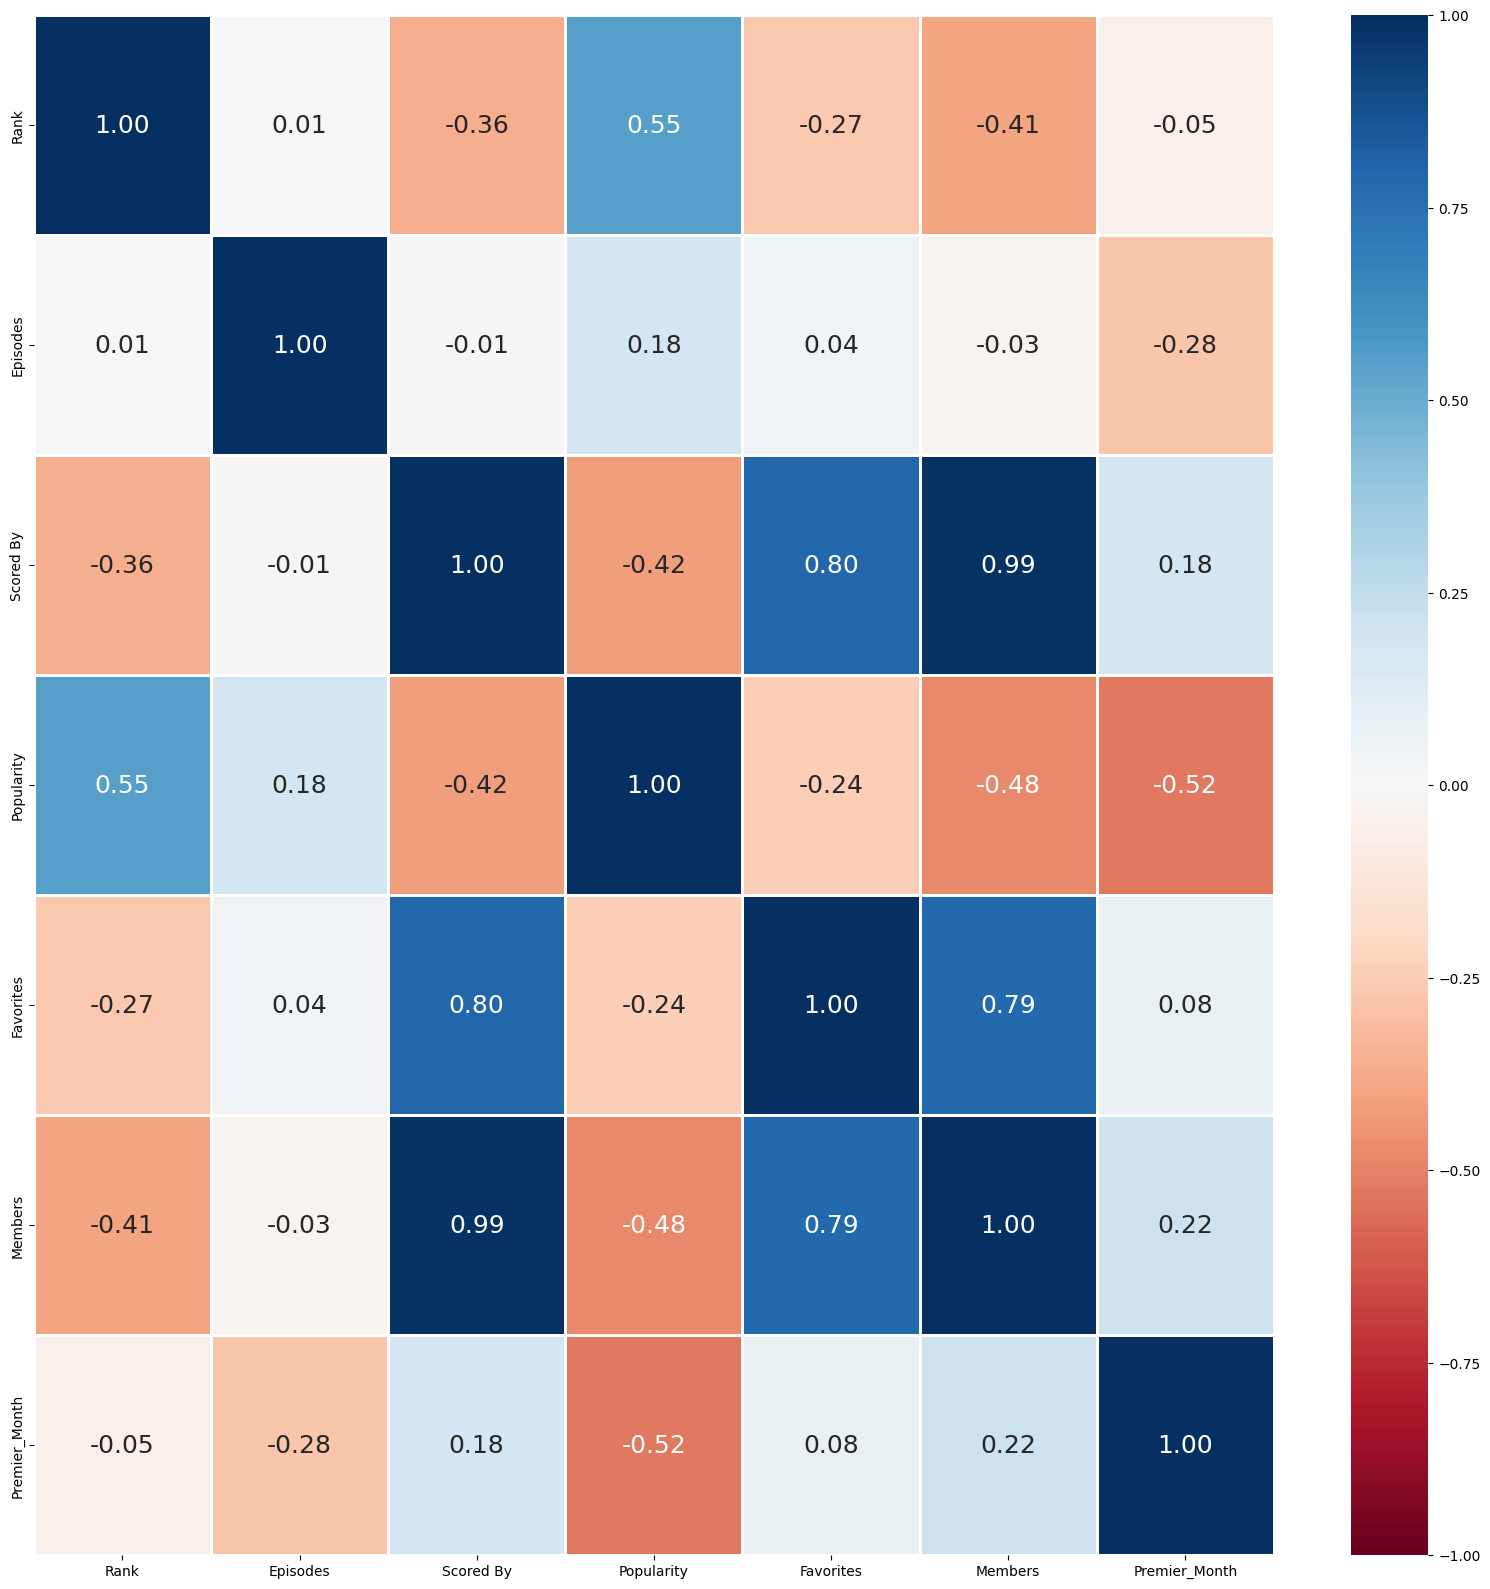

In [22]:
# Correlation Matrix
print(numdf.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numdf.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Based on correlation matrix, best numeric variables to preodict Score based on coeffeceint correlation are:\
    1.Rank\
    2.Popularity\
    3.Members\
    4.Scored by\
    5.Duration_mins\
    6.Favourites

We find that `Rank` and `Score` has a very obvious correlation(almost perfect correlation). This is due to `rank` on MyAnimeList being heavily determined by `Score`.\
Hence, we will not evaluate `Score` using Rank for the later analysis.

The next best metric to use is `Popularity`. \
As `Members` and `Scored_by`, are heavily correlated to one another, we will only choose the better one, `Member` to try later on in our analysis.